# Analysis ribosome occupancy in 5Pseq fragments

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import os
from plotnine import *
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import time
np.random.seed(1234)

In [2]:
data_path = '../../data/'

In [3]:
series_coefs_df = pd.read_csv(data_path + 'trehalose_series_3_chunks_betas_all_batches.csv', index_col=0)
series_coefs_df

,beta_Trehalose_t-5_1_0,Std.Err._Trehalose_t-5_1_0,z_Trehalose_t-5_1_0,P>|z|_Trehalose_t-5_1_0,[0.025_Trehalose_t-5_1_0,0.975]_Trehalose_t-5_1_0,beta_Trehalose_t-5_1_1,Std.Err._Trehalose_t-5_1_1,z_Trehalose_t-5_1_1,P>|z|_Trehalose_t-5_1_1,...,z_Trehalose_t0_3_1,P>|z|_Trehalose_t0_3_1,[0.025_Trehalose_t0_3_1,0.975]_Trehalose_t0_3_1,beta_Trehalose_t0_3_2,Std.Err._Trehalose_t0_3_2,z_Trehalose_t0_3_2,P>|z|_Trehalose_t0_3_2,[0.025_Trehalose_t0_3_2,0.975]_Trehalose_t0_3_2
Intercept,2.452027,0.058703,41.770068,0.000000e+00,2.336971,2.567083,2.480726,0.058650,42.297175,0.000000e+00,...,43.558814,0.000000e+00,2.421202,2.649356,2.493747,0.058211,42.839586,0.000000e+00,2.379655,2.607839
AAC,-0.275794,0.022588,-12.209594,2.762627e-34,-0.320066,-0.231521,-0.213129,0.021920,-9.722981,2.406304e-22,...,-11.678136,1.648720e-31,-0.278961,-0.198781,-0.225032,0.020516,-10.968565,5.412439e-28,-0.265243,-0.184821
AAG,0.023337,0.019227,1.213782,2.248311e-01,-0.014347,0.061021,0.009613,0.019132,0.502485,6.153264e-01,...,-0.630616,5.282916e-01,-0.046640,0.023933,0.030685,0.017834,1.720629,8.531822e-02,-0.004268,0.065638
AAT,-0.208056,0.020198,-10.300625,7.000507e-25,-0.247644,-0.168468,-0.232063,0.019803,-11.718504,1.024650e-31,...,-13.736135,6.168221e-43,-0.290586,-0.218015,-0.194889,0.018359,-10.615342,2.528658e-26,-0.230872,-0.158906
ACA,-0.316955,0.026511,-11.955758,6.057853e-33,-0.368914,-0.264995,-0.352977,0.026743,-13.198720,8.923903e-40,...,-12.365519,4.016113e-35,-0.344245,-0.250048,-0.298695,0.024238,-12.323333,6.783143e-35,-0.346201,-0.251189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAR020C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAR050W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOL128C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YKL068W-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
series_coefs_df.columns[:12]

Index(['beta_Trehalose_t-5_1_0', 'Std.Err._Trehalose_t-5_1_0',
       'z_Trehalose_t-5_1_0', 'P>|z|_Trehalose_t-5_1_0',
       '[0.025_Trehalose_t-5_1_0', '0.975]_Trehalose_t-5_1_0',
       'beta_Trehalose_t-5_1_1', 'Std.Err._Trehalose_t-5_1_1',
       'z_Trehalose_t-5_1_1', 'P>|z|_Trehalose_t-5_1_1',
       '[0.025_Trehalose_t-5_1_1', '0.975]_Trehalose_t-5_1_1'],
      dtype='object')

In [5]:
series_coefs_df = series_coefs_df.T
series_coefs_df.index.name='params'
series_coefs_df.reset_index(inplace=True)
series_coefs_df

,params,Intercept,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,...,YOR357C,YPL279C,YDL037C,YOR032C,YER085C,YAR020C,YAR050W,YOL128C,YKL068W-A,YER180C-A
0,beta_Trehalose_t-5_1_0,2.452027,-2.757936e-01,0.023337,-2.080556e-01,-3.169545e-01,-4.252037e-01,-2.403666e-01,-3.909795e-01,-0.089258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Std.Err._Trehalose_t-5_1_0,0.058703,2.258827e-02,0.019227,2.019835e-02,2.651062e-02,3.017284e-02,3.609599e-02,2.506093e-02,0.022298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,z_Trehalose_t-5_1_0,41.770068,-1.220959e+01,1.213782,-1.030062e+01,-1.195576e+01,-1.409227e+01,-6.659094e+00,-1.560116e+01,-4.002913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P>|z|_Trehalose_t-5_1_0,0.000000,2.762627e-34,0.224831,7.000507e-25,6.057853e-33,4.237344e-45,2.755198e-11,7.148633e-55,0.000063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[0.025_Trehalose_t-5_1_0,2.336971,-3.200658e-01,-0.014347,-2.476437e-01,-3.689144e-01,-4.843414e-01,-3.111134e-01,-4.400980e-01,-0.132962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Std.Err._Trehalose_t0_3_2,0.058211,2.051608e-02,0.017834,1.835918e-02,2.423815e-02,2.832729e-02,3.340953e-02,2.376889e-02,0.020306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,z_Trehalose_t0_3_2,42.839586,-1.096857e+01,1.720629,-1.061534e+01,-1.232333e+01,-1.443338e+01,-8.795521e+00,-1.856406e+01,-1.028675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,P>|z|_Trehalose_t0_3_2,0.000000,5.412439e-28,0.085318,2.528658e-26,6.783143e-35,3.190317e-47,1.423857e-18,6.278201e-77,0.303632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,[0.025_Trehalose_t0_3_2,2.379655,-2.652428e-01,-0.004268,-2.308723e-01,-3.462007e-01,-4.643792e-01,-3.593357e-01,-4.878332e-01,-0.060688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
series_coefs_df['params'] = series_coefs_df['params'].apply(lambda el: '_'.join(el.split('_')[:-1])) # remove chunk index

In [7]:
series_coefs_df = series_coefs_df[series_coefs_df['params'].str.contains('beta')] # extract coefficients only
series_coefs_df

,params,Intercept,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,...,YOR357C,YPL279C,YDL037C,YOR032C,YER085C,YAR020C,YAR050W,YOL128C,YKL068W-A,YER180C-A
0,beta_Trehalose_t-5_1,2.452027,-0.275794,0.023337,-0.208056,-0.316955,-0.425204,-0.240367,-0.390980,-0.089258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,beta_Trehalose_t-5_1,2.480726,-0.213129,0.009613,-0.232063,-0.352977,-0.460786,-0.256160,-0.411275,-0.083267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,beta_Trehalose_t-5_1,2.415507,-0.240135,0.008378,-0.232944,-0.327559,-0.402938,-0.262454,-0.419140,-0.097668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,beta_Trehalose_t5_1,2.541921,-0.188386,0.017244,-0.228646,-0.404050,-0.440149,-0.324434,-0.472298,-0.011641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,beta_Trehalose_t5_1,2.610776,-0.265036,0.033314,-0.241675,-0.383404,-0.475355,-0.363728,-0.471211,-0.009702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,beta_Trehalose_t5_1,2.595776,-0.243034,-0.008666,-0.222255,-0.366749,-0.476512,-0.240786,-0.467488,0.009645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,beta_Trehalose_t10_1,2.745865,-0.239596,-0.000601,-0.238168,-0.413104,-0.457384,-0.205600,-0.471248,0.012753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,beta_Trehalose_t10_1,2.730052,-0.229244,0.046353,-0.217797,-0.332580,-0.477796,-0.262576,-0.442195,0.000859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,beta_Trehalose_t10_1,2.737898,-0.201648,0.015147,-0.213041,-0.339615,-0.447629,-0.256062,-0.445800,-0.035539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,beta_Trehalose_t2_1,2.564800,-0.209481,0.007768,-0.196275,-0.370628,-0.449902,-0.253185,-0.483605,-0.003612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotting the distribution of coefficents for one codon across sampled gene chunks

Let's consider 2 timepoints in the same sample

In [8]:
sample_2_tp = series_coefs_df[(series_coefs_df.params=='beta_Trehalose_t-5_1') | (series_coefs_df.params=='beta_Trehalose_t0_1')]
sample_2_tp_codons= sample_2_tp.drop('Intercept', axis=1).iloc[:,:61]
sample_2_tp_codons

,params,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCC,TCG,TCT,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,beta_Trehalose_t-5_1,-0.275794,0.023337,-0.208056,-0.316955,-0.425204,-0.240367,-0.390980,-0.089258,-0.257231,...,-0.262245,-0.059499,-0.318109,-0.195411,0.157102,-0.300038,-0.178078,-0.403861,-0.167665,-0.380201
6,beta_Trehalose_t-5_1,-0.213129,0.009613,-0.232063,-0.352977,-0.460786,-0.256160,-0.411275,-0.083267,-0.256831,...,-0.308867,-0.079030,-0.336799,-0.139720,0.156805,-0.200247,-0.220972,-0.395373,-0.200928,-0.352170
12,beta_Trehalose_t-5_1,-0.240135,0.008378,-0.232944,-0.327559,-0.402938,-0.262454,-0.419140,-0.097668,-0.263394,...,-0.294025,-0.031451,-0.321186,-0.105829,0.169373,-0.243239,-0.224148,-0.335462,-0.208331,-0.360000
72,beta_Trehalose_t0_1,-0.267179,0.114982,-0.254231,-0.355765,-0.465641,-0.162381,-0.489797,0.090827,-0.167258,...,-0.408946,-0.033442,-0.419548,-0.154101,0.265866,-0.165069,-0.202703,-0.438792,-0.194358,-0.418461
78,beta_Trehalose_t0_1,-0.282522,0.098886,-0.272390,-0.410351,-0.533100,-0.275680,-0.500523,0.053425,-0.227963,...,-0.381148,-0.037675,-0.460033,-0.114349,0.214201,-0.224184,-0.232151,-0.445292,-0.224817,-0.423638
84,beta_Trehalose_t0_1,-0.234321,0.084772,-0.259689,-0.389133,-0.517653,-0.197258,-0.419428,0.042235,-0.144456,...,-0.386558,-0.051126,-0.391064,-0.094630,0.258326,-0.219463,-0.165168,-0.471195,-0.180885,-0.398331


In [9]:
sample_2_tp_codons_melted = sample_2_tp_codons.melt(id_vars='params', var_name='codon')

In [10]:
sample_2_tp_codons_melted['codon'] = pd.Categorical(values=sample_2_tp_codons_melted['codon'], categories=sample_2_tp_codons.median().sort_values().index, ordered=True)

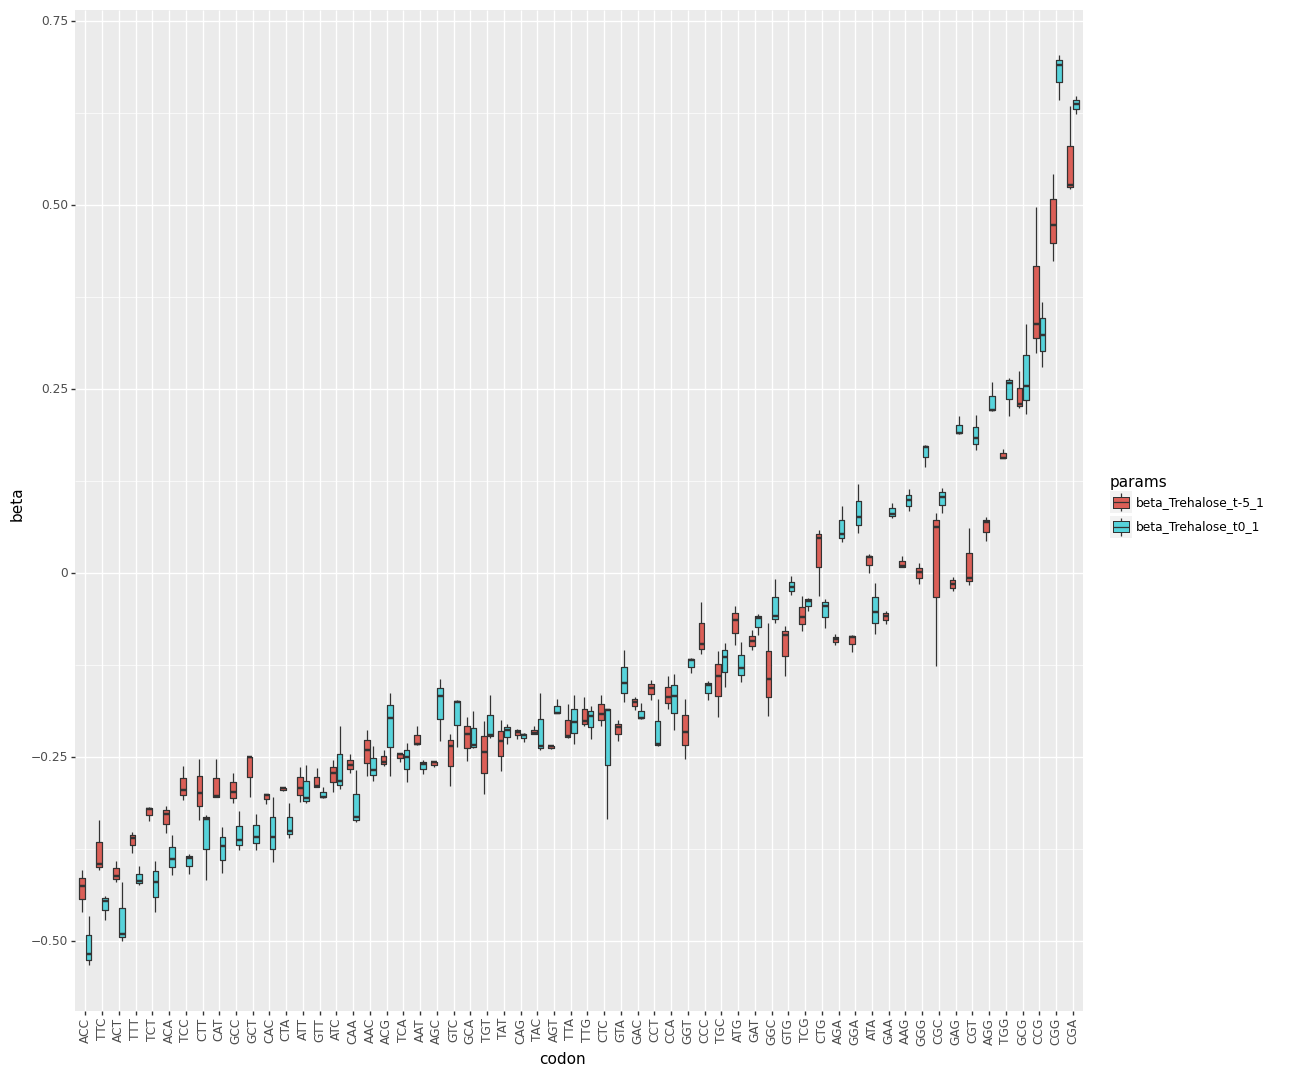

<ggplot: (1459265751693)>

In [11]:
(ggplot(sample_2_tp_codons_melted, aes('codon','value', fill='params'))
    + geom_boxplot(position='dodge2')
    + theme(figure_size=(13,13), axis_text_x=element_text(angle=90))
    + labs(y='beta'))

In [12]:
series_coefs_median_chunks_df = series_coefs_df.groupby('params').mean().T # get the mean coefficient values for each feature across gene chunks
series_coefs_median_chunks_df

params,beta_Trehalose_t-5_1,beta_Trehalose_t-5_2,beta_Trehalose_t-5_3,beta_Trehalose_t0_1,beta_Trehalose_t0_2,beta_Trehalose_t0_3,beta_Trehalose_t10_1,beta_Trehalose_t10_2,beta_Trehalose_t10_3,beta_Trehalose_t2_1,beta_Trehalose_t2_2,beta_Trehalose_t2_3,beta_Trehalose_t5_1,beta_Trehalose_t5_2,beta_Trehalose_t5_3
Intercept,2.449420,2.266506,0.454903,1.910384,2.669552,2.510759,2.737938,2.406053,2.437407,2.525603,2.490484,2.589279,2.582824,2.356321,2.700416
AAC,-0.243019,-0.270767,-0.354276,-0.261341,-0.214579,-0.216649,-0.223496,-0.264118,-0.206741,-0.190895,-0.286538,-0.116260,-0.232152,-0.295864,-0.169113
AAG,0.013776,-0.004561,0.069643,0.099547,0.023520,-0.006297,0.020300,0.017468,-0.013348,0.006978,0.047967,0.068429,0.013964,-0.024883,0.011553
AAT,-0.224354,-0.248344,-0.394985,-0.262103,-0.235599,-0.236503,-0.223002,-0.261404,-0.234363,-0.205954,-0.274274,-0.155939,-0.230859,-0.289108,-0.192065
ACA,-0.332497,-0.223477,-0.465184,-0.385083,-0.165440,-0.301856,-0.361766,-0.326525,-0.350037,-0.361787,-0.329846,-0.219645,-0.384734,-0.336700,-0.258581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAR020C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.035671
YAR050W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.812049
YOL128C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.414273
YKL068W-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.557548


### Relationship with known metrics of codon speed and optimality

In [13]:
# Get decoding rate and codon optimality measures in yeast
csc_df = pd.read_csv(data_path+'csc_yeast.csv', index_col=0)
cdt_df = pd.read_csv(data_path+'cdt_tuller_organisms.csv', sep=';').rename({'Codon':'codon'}, axis=1)
codon_metrics_df = cdt_df.merge(csc_df, left_on='codon', right_index=True).loc[:, ['codon','Coller', 'S. cerevisiae Exponential']]
codon_metrics_df.rename({'Coller':'CSC_JColler', 'S. cerevisiae Exponential':'dec_time_Tuller'}, axis=1,inplace=True)

In [14]:
codon_coefs_metrics_df = codon_metrics_df.merge(series_coefs_median_chunks_df, left_on='codon', right_index=True).set_index('codon')
codon_coefs_metrics_df

,CSC_JColler,dec_time_Tuller,beta_Trehalose_t-5_1,beta_Trehalose_t-5_2,beta_Trehalose_t-5_3,beta_Trehalose_t0_1,beta_Trehalose_t0_2,beta_Trehalose_t0_3,beta_Trehalose_t10_1,beta_Trehalose_t10_2,beta_Trehalose_t10_3,beta_Trehalose_t2_1,beta_Trehalose_t2_2,beta_Trehalose_t2_3,beta_Trehalose_t5_1,beta_Trehalose_t5_2,beta_Trehalose_t5_3
codon,,,,,,,,,,,,,,,,,
AAC,0.067720,0.17145,-0.243019,-0.270767,-0.354276,-0.261341,-0.214579,-0.216649,-0.223496,-0.264118,-0.206741,-0.190895,-0.286538,-0.116260,-0.232152,-0.295864,-0.169113
AAG,0.102900,0.16835,0.013776,-0.004561,0.069643,0.099547,0.023520,-0.006297,0.020300,0.017468,-0.013348,0.006978,0.047967,0.068429,0.013964,-0.024883,0.011553
AAT,-0.128400,0.23380,-0.224354,-0.248344,-0.394985,-0.262103,-0.235599,-0.236503,-0.223002,-0.261404,-0.234363,-0.205954,-0.274274,-0.155939,-0.230859,-0.289108,-0.192065
ACA,-0.142300,0.22216,-0.332497,-0.223477,-0.465184,-0.385083,-0.165440,-0.301856,-0.361766,-0.326525,-0.350037,-0.361787,-0.329846,-0.219645,-0.384734,-0.336700,-0.258581
ACC,0.126700,0.12148,-0.429642,-0.377811,-0.566406,-0.505465,-0.326907,-0.445593,-0.460936,-0.388101,-0.428582,-0.445470,-0.434291,-0.338427,-0.464006,-0.471422,-0.349802
ACG,-0.155100,0.24905,-0.252994,-0.167677,-0.246524,-0.211773,-0.137836,-0.296178,-0.241413,-0.211471,-0.261814,-0.284470,-0.223654,-0.208041,-0.309649,-0.267244,-0.217563
ACT,0.143400,0.14241,-0.407131,-0.362247,-0.614950,-0.469916,-0.327904,-0.431691,-0.453081,-0.369200,-0.425839,-0.467430,-0.457943,-0.336187,-0.470333,-0.445381,-0.360703
AGA,0.041900,0.14998,-0.090064,0.053162,-0.082623,0.062162,0.090960,-0.057206,-0.007309,-0.008342,-0.087665,0.005037,0.088437,-0.039937,-0.003899,-0.030619,-0.061424
AGC,-0.148500,0.22846,-0.259152,-0.198932,-0.353231,-0.179893,-0.137221,-0.283951,-0.274230,-0.266944,-0.282889,-0.269123,-0.248118,-0.167463,-0.268812,-0.351723,-0.230499


Time point -5 of batch 3 has a very different 5Pseq reads pattern, where the coverage was much reduced, therefore we won't keep it:

In [15]:
codon_coefs_metrics_df = codon_coefs_metrics_df.loc[:,~codon_coefs_metrics_df.columns.str.contains('beta_Trehalose_t-5_3')].copy()

Next let's calculate the median effect (beta) on the initial time point across both batch 1 and 2

In [16]:
codon_coefs_metrics_df['mean_beta_init'] = codon_coefs_metrics_df.loc[:, codon_coefs_metrics_df.columns.str.contains('-5')].mean(axis=1) 

In [17]:
# Correlation heatmap
corr_coefs_df = codon_coefs_metrics_df.copy()
corr_coefs_df.insert(1, 'decoding rate (codon/s)', 1/corr_coefs_df['dec_time_Tuller'])
corr_coefs_df.drop('dec_time_Tuller', axis=1,inplace=True)
corr_coefs_df.rename({'CSC_JColler':'CSC',  'mean_beta_init':'mean A-site residency t=-5min'}, axis=1,inplace=True)
new_cols = {col: col.replace("beta_Trehalose_t", "A-site residency t=").replace("_", "min b=").replace("t=0min","t=30s") for col in corr_coefs_df.columns}
corr_coefs_df.rename(new_cols,axis=1,inplace=True)
corr_coefs_df

,CSC,decoding rate (codon/s),A-site residency t=-5min b=1,A-site residency t=-5min b=2,A-site residency t=30s b=1,A-site residency t=30s b=2,A-site residency t=30s b=3,A-site residency t=10min b=1,A-site residency t=10min b=2,A-site residency t=10min b=3,A-site residency t=2min b=1,A-site residency t=2min b=2,A-site residency t=2min b=3,A-site residency t=5min b=1,A-site residency t=5min b=2,A-site residency t=5min b=3,mean A-site residency t=-5min
codon,,,,,,,,,,,,,,,,,
AAC,0.067720,5.832604,-0.243019,-0.270767,-0.261341,-0.214579,-0.216649,-0.223496,-0.264118,-0.206741,-0.190895,-0.286538,-0.116260,-0.232152,-0.295864,-0.169113,-0.256893
AAG,0.102900,5.940006,0.013776,-0.004561,0.099547,0.023520,-0.006297,0.020300,0.017468,-0.013348,0.006978,0.047967,0.068429,0.013964,-0.024883,0.011553,0.004607
AAT,-0.128400,4.277160,-0.224354,-0.248344,-0.262103,-0.235599,-0.236503,-0.223002,-0.261404,-0.234363,-0.205954,-0.274274,-0.155939,-0.230859,-0.289108,-0.192065,-0.236349
ACA,-0.142300,4.501260,-0.332497,-0.223477,-0.385083,-0.165440,-0.301856,-0.361766,-0.326525,-0.350037,-0.361787,-0.329846,-0.219645,-0.384734,-0.336700,-0.258581,-0.277987
ACC,0.126700,8.231808,-0.429642,-0.377811,-0.505465,-0.326907,-0.445593,-0.460936,-0.388101,-0.428582,-0.445470,-0.434291,-0.338427,-0.464006,-0.471422,-0.349802,-0.403727
ACG,-0.155100,4.015258,-0.252994,-0.167677,-0.211773,-0.137836,-0.296178,-0.241413,-0.211471,-0.261814,-0.284470,-0.223654,-0.208041,-0.309649,-0.267244,-0.217563,-0.210335
ACT,0.143400,7.021979,-0.407131,-0.362247,-0.469916,-0.327904,-0.431691,-0.453081,-0.369200,-0.425839,-0.467430,-0.457943,-0.336187,-0.470333,-0.445381,-0.360703,-0.384689
AGA,0.041900,6.667556,-0.090064,0.053162,0.062162,0.090960,-0.057206,-0.007309,-0.008342,-0.087665,0.005037,0.088437,-0.039937,-0.003899,-0.030619,-0.061424,-0.018451
AGC,-0.148500,4.377134,-0.259152,-0.198932,-0.179893,-0.137221,-0.283951,-0.274230,-0.266944,-0.282889,-0.269123,-0.248118,-0.167463,-0.268812,-0.351723,-0.230499,-0.229042


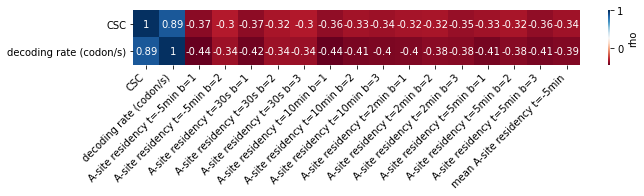

In [18]:
corr_df = corr_coefs_df.corr(method='spearman').iloc[:2,:]
fig, ax = plt.subplots(figsize=(10,1)) 

hmap = sns.heatmap(corr_df, cmap='RdBu', ax=ax, annot=True, cbar_kws={'label': 'rho'})
hmap.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
hmap.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [19]:
fig.savefig("../../figures/plots/fig3/fig_s3_cor_occ_opt.png", dpi=200,bbox_inches="tight")

In [20]:
corr_coefs_df.to_csv('../../figures/figure_data/fig3/cor_csc_dectime_ribo_res.csv')

In [21]:
# get quartiles of the betas from the initial time point
codon_coefs_metrics_df['init_beta_quantile'] = pd.qcut(codon_coefs_metrics_df['mean_beta_init'], 4) 
# melt betas of all samples
codon_coefs_metrics_melted = codon_coefs_metrics_df.reset_index().melt(id_vars=['codon','CSC_JColler','dec_time_Tuller','mean_beta_init', 
                                                                                'init_beta_quantile'], var_name='sample', 
                                                                       value_name='beta_codon')
codon_coefs_metrics_melted['sample'] = codon_coefs_metrics_melted['sample'].apply(lambda el: el.split('beta_')[1])
codon_coefs_metrics_melted

,codon,CSC_JColler,dec_time_Tuller,mean_beta_init,init_beta_quantile,sample,beta_codon
0,AAC,0.06772,0.17145,-0.256893,"(-0.405, -0.249]",Trehalose_t-5_1,-0.243019
1,AAG,0.10290,0.16835,0.004607,"(-0.0138, 0.635]",Trehalose_t-5_1,0.013776
2,AAT,-0.12840,0.23380,-0.236349,"(-0.249, -0.165]",Trehalose_t-5_1,-0.224354
3,ACA,-0.14230,0.22216,-0.277987,"(-0.405, -0.249]",Trehalose_t-5_1,-0.332497
4,ACC,0.12670,0.12148,-0.403727,"(-0.405, -0.249]",Trehalose_t-5_1,-0.429642
...,...,...,...,...,...,...,...
835,TGT,-0.03240,0.17474,-0.224086,"(-0.249, -0.165]",Trehalose_t5_3,-0.168999
836,TTA,-0.03692,0.21889,-0.208145,"(-0.249, -0.165]",Trehalose_t5_3,-0.202082
837,TTC,0.09424,0.16125,-0.347757,"(-0.405, -0.249]",Trehalose_t5_3,-0.333717
838,TTG,0.19940,0.18871,-0.165916,"(-0.249, -0.165]",Trehalose_t5_3,-0.171773


In [22]:
codon_coefs_metrics_melted['init_beta_quantile'].cat.categories

IntervalIndex([(-0.405, -0.249], (-0.249, -0.165], (-0.165, -0.0138], (-0.0138, 0.635]],
              closed='right',
              dtype='interval[float64]')

In [23]:
codons_25_perc_faster = codon_coefs_metrics_melted['init_beta_quantile'].cat.categories[0]
print(codons_25_perc_faster)
codons_25_perc_slower = codon_coefs_metrics_melted['init_beta_quantile'].cat.categories[-1]
codons_25_perc_slower

(-0.405, -0.249]


Interval(-0.0138, 0.635, closed='right')

In [24]:
def name_25_percent_fast_slow(interval):
    if interval == codons_25_perc_faster:
        return 'Fast codons'
    elif interval == codons_25_perc_slower:
        return 'Slow codons'
    else:
        return 'Other quantile'

In [25]:
codon_coefs_metrics_melted['codon_group'] = codon_coefs_metrics_melted['init_beta_quantile'].apply(name_25_percent_fast_slow)
codon_coefs_metrics_melted

,codon,CSC_JColler,dec_time_Tuller,mean_beta_init,init_beta_quantile,sample,beta_codon,codon_group
0,AAC,0.06772,0.17145,-0.256893,"(-0.405, -0.249]",Trehalose_t-5_1,-0.243019,Fast codons
1,AAG,0.10290,0.16835,0.004607,"(-0.0138, 0.635]",Trehalose_t-5_1,0.013776,Slow codons
2,AAT,-0.12840,0.23380,-0.236349,"(-0.249, -0.165]",Trehalose_t-5_1,-0.224354,Other quantile
3,ACA,-0.14230,0.22216,-0.277987,"(-0.405, -0.249]",Trehalose_t-5_1,-0.332497,Fast codons
4,ACC,0.12670,0.12148,-0.403727,"(-0.405, -0.249]",Trehalose_t-5_1,-0.429642,Fast codons
...,...,...,...,...,...,...,...,...
835,TGT,-0.03240,0.17474,-0.224086,"(-0.249, -0.165]",Trehalose_t5_3,-0.168999,Other quantile
836,TTA,-0.03692,0.21889,-0.208145,"(-0.249, -0.165]",Trehalose_t5_3,-0.202082,Other quantile
837,TTC,0.09424,0.16125,-0.347757,"(-0.405, -0.249]",Trehalose_t5_3,-0.333717,Fast codons
838,TTG,0.19940,0.18871,-0.165916,"(-0.249, -0.165]",Trehalose_t5_3,-0.171773,Other quantile


In [26]:
codon_coefs_metrics_melted['batch'] = codon_coefs_metrics_melted['sample'].apply(lambda el: el.split('_')[-1])

codon_coefs_metrics_melted['time_point'] = codon_coefs_metrics_melted['sample'].apply(lambda el: el.split('_')[1][1:])
# The addition of the drug was at time point 0 which corresponds to the 5Pseq readout at 30s or 0.5min 
codon_coefs_metrics_melted['time_point'].replace({r'(?<!\d)0':'0.5'}, regex=True,inplace=True)
codon_coefs_metrics_melted

,codon,CSC_JColler,dec_time_Tuller,mean_beta_init,init_beta_quantile,sample,beta_codon,codon_group,batch,time_point
0,AAC,0.06772,0.17145,-0.256893,"(-0.405, -0.249]",Trehalose_t-5_1,-0.243019,Fast codons,1,-5
1,AAG,0.10290,0.16835,0.004607,"(-0.0138, 0.635]",Trehalose_t-5_1,0.013776,Slow codons,1,-5
2,AAT,-0.12840,0.23380,-0.236349,"(-0.249, -0.165]",Trehalose_t-5_1,-0.224354,Other quantile,1,-5
3,ACA,-0.14230,0.22216,-0.277987,"(-0.405, -0.249]",Trehalose_t-5_1,-0.332497,Fast codons,1,-5
4,ACC,0.12670,0.12148,-0.403727,"(-0.405, -0.249]",Trehalose_t-5_1,-0.429642,Fast codons,1,-5
...,...,...,...,...,...,...,...,...,...,...
835,TGT,-0.03240,0.17474,-0.224086,"(-0.249, -0.165]",Trehalose_t5_3,-0.168999,Other quantile,3,5
836,TTA,-0.03692,0.21889,-0.208145,"(-0.249, -0.165]",Trehalose_t5_3,-0.202082,Other quantile,3,5
837,TTC,0.09424,0.16125,-0.347757,"(-0.405, -0.249]",Trehalose_t5_3,-0.333717,Fast codons,3,5
838,TTG,0.19940,0.18871,-0.165916,"(-0.249, -0.165]",Trehalose_t5_3,-0.171773,Other quantile,3,5


In [27]:
codon_coefs_metrics_melted.to_csv('../../figures/figure_data/fig3/all_fitted_betas.csv')

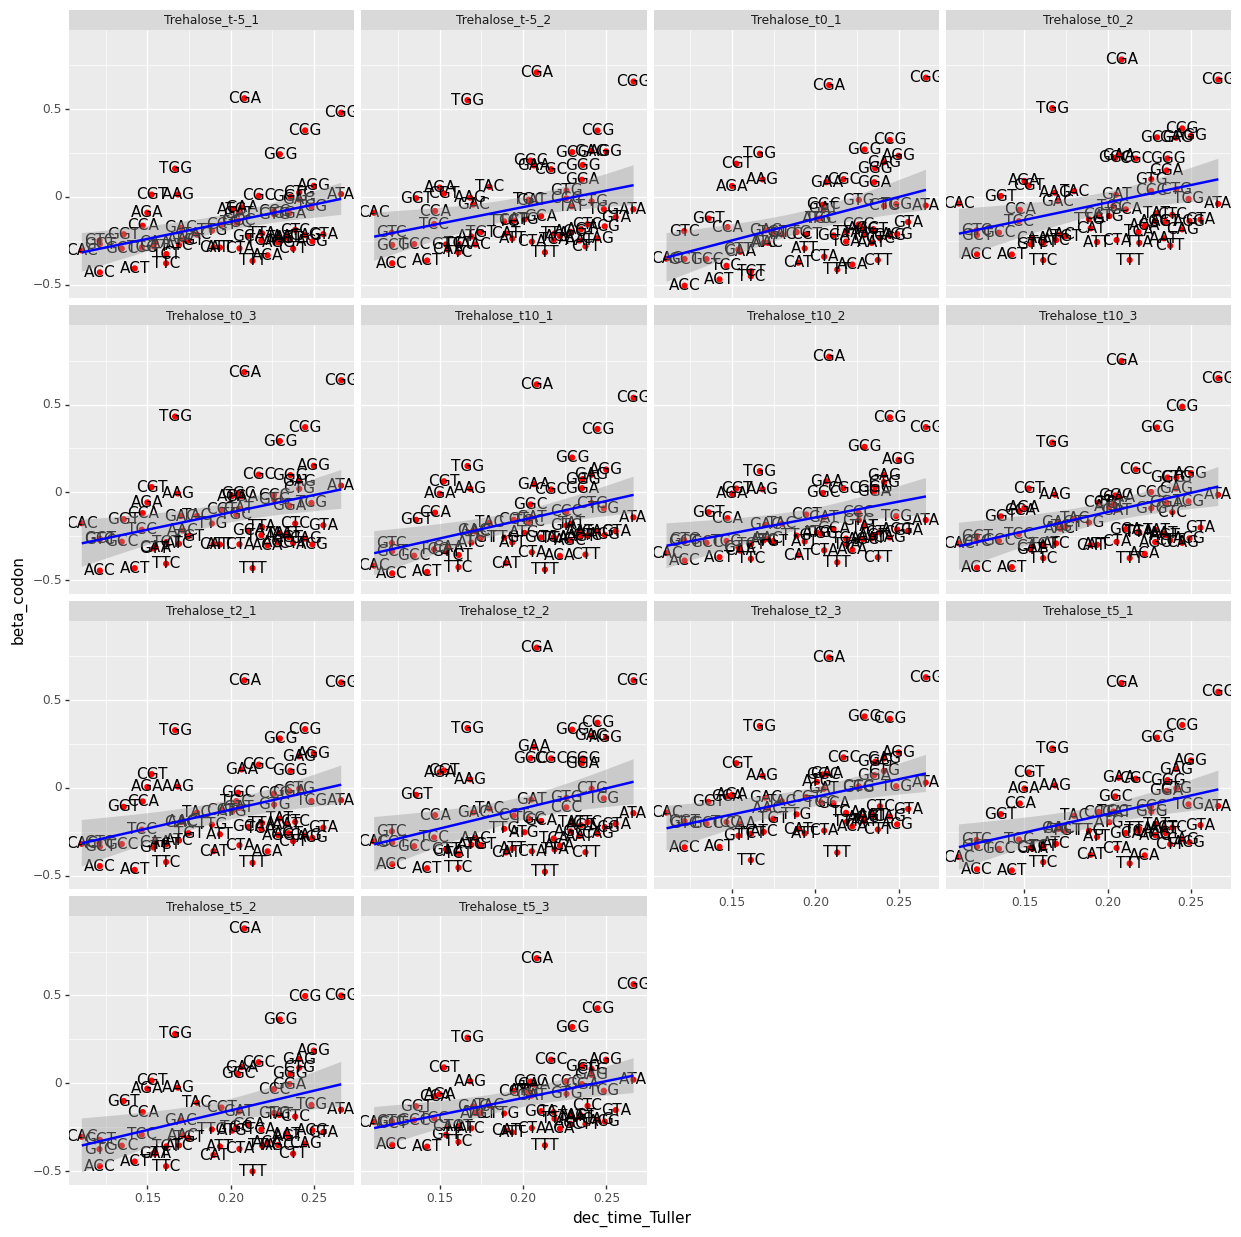

<ggplot: (1459051318741)>

In [28]:
(ggplot(codon_coefs_metrics_melted, aes('dec_time_Tuller', 'beta_codon', label='codon'))
    + geom_point(color='red')
    + geom_text()
    + geom_smooth(method='lm', color='blue')
    + facet_wrap('~sample')
    + theme(figure_size=(15,15)))